In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv("/home/antoiovi/seaborn-data/tips.csv")

In [90]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

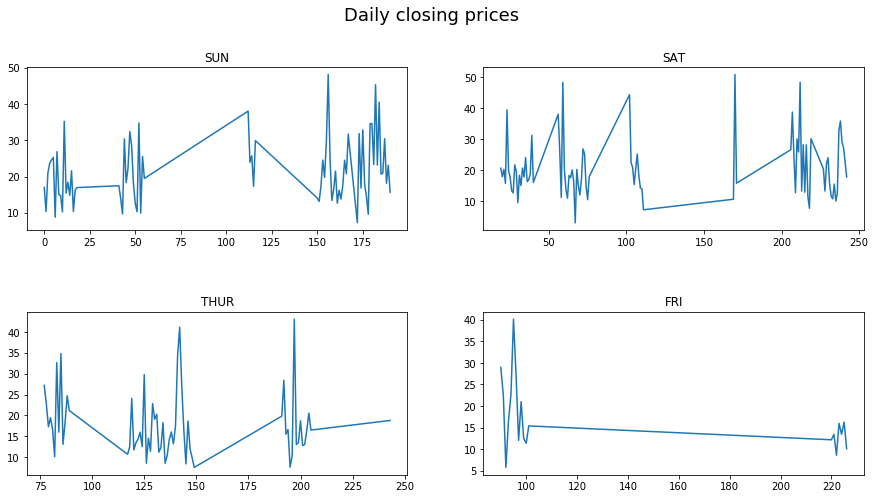

In [18]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
tickers=df['day'].unique()
# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    df[df["day"] == ticker]['total_bill'].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")


sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

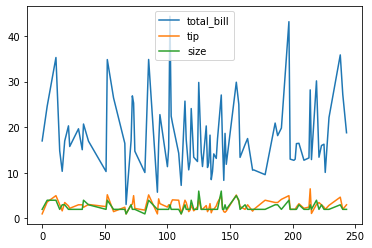

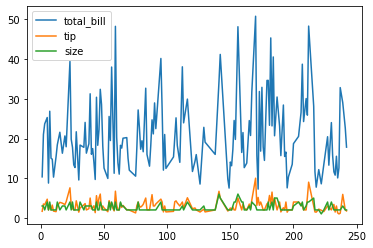

In [21]:
df.groupby('sex').plot()

sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip, dtype: object

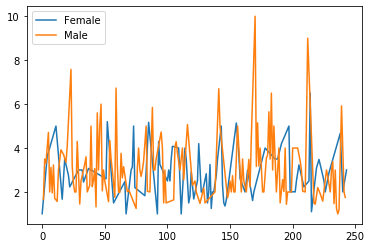

In [23]:
df.groupby('sex')['tip'].plot(legend=True)

sex     day 
Female  Fri     AxesSubplot(0.125,0.125;0.775x0.755)
        Sat     AxesSubplot(0.125,0.125;0.775x0.755)
        Sun     AxesSubplot(0.125,0.125;0.775x0.755)
        Thur    AxesSubplot(0.125,0.125;0.775x0.755)
Male    Fri     AxesSubplot(0.125,0.125;0.775x0.755)
        Sat     AxesSubplot(0.125,0.125;0.775x0.755)
        Sun     AxesSubplot(0.125,0.125;0.775x0.755)
        Thur    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip, dtype: object

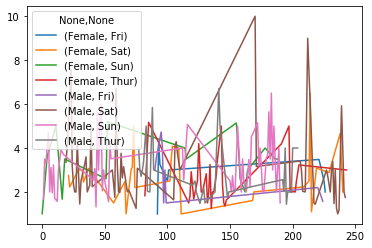

In [26]:
df.groupby(['sex','day'])['tip'].plot(legend=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8791dd2810>,
      dtype=object)

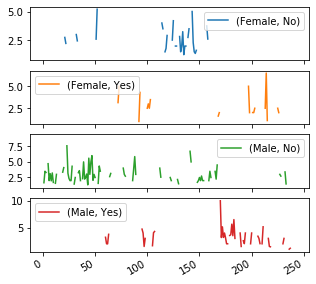

In [35]:
pd.pivot_table(df, columns=['sex','smoker'], index=df.index,values='tip'
              ).plot(subplots=True,figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87920fe7d0>,
      dtype=object)

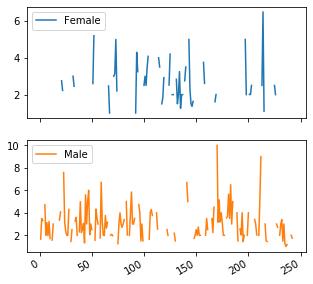

In [33]:
pd.pivot_table(df, columns='sex', index=df.index,values='tip'
              ).plot(subplots=True,figsize=(5,5))

In [58]:
df.groupby(['sex','day','smoker'])['tip'].mean().unstack(2)

smoker             No       Yes
sex    day                     
Female Fri   3.125000  2.682857
       Sat   2.724615  2.868667
       Sun   3.329286  3.500000
       Thur  2.459600  2.990000
Male   Fri   2.500000  2.741250
       Sat   3.256563  2.879259
       Sun   3.115349  3.521333
       Thur  2.941500  3.058000

In [59]:
df.groupby(['sex','day','smoker'])['tip'].mean().unstack(1)

day                 Fri       Sat       Sun    Thur
sex    smoker                                      
Female No      3.125000  2.724615  3.329286  2.4596
       Yes     2.682857  2.868667  3.500000  2.9900
Male   No      2.500000  3.256563  3.115349  2.9415
       Yes     2.741250  2.879259  3.521333  3.0580

In [57]:
df.groupby(['sex','day','smoker'])['tip'].mean().unstack(1).unstack(0)

day          Fri                Sat                 Sun              Thur  \
sex       Female     Male    Female      Male    Female      Male  Female   
smoker                                                                      
No      3.125000  2.50000  2.724615  3.256563  3.329286  3.115349  2.4596   
Yes     2.682857  2.74125  2.868667  2.879259  3.500000  3.521333  2.9900   

day             
sex       Male  
smoker          
No      2.9415  
Yes     3.0580

In [61]:
df.groupby(['sex','day','smoker'])['tip'].mean().unstack(0).unstack(1)

sex       Female                Male          
smoker        No       Yes        No       Yes
day                                           
Fri     3.125000  2.682857  2.500000  2.741250
Sat     2.724615  2.868667  3.256563  2.879259
Sun     3.329286  3.500000  3.115349  3.521333
Thur    2.459600  2.990000  2.941500  3.058000

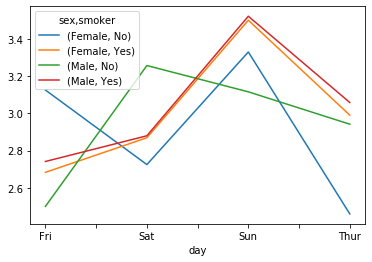

In [62]:
df.groupby(['sex','day','smoker'])['tip'].mean().unstack(0).unstack(1).plot()

In [66]:
x=df.groupby(['sex','day','smoker'])['tip'].mean().unstack(0).unstack(1)
x

sex       Female                Male          
smoker        No       Yes        No       Yes
day                                           
Fri     3.125000  2.682857  2.500000  2.741250
Sat     2.724615  2.868667  3.256563  2.879259
Sun     3.329286  3.500000  3.115349  3.521333
Thur    2.459600  2.990000  2.941500  3.058000

In [92]:
sex=df['sex'].unique()

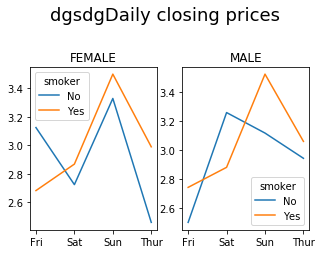

In [94]:
plt.figure(figsize=(5, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("dgsdgDaily closing prices", fontsize=18, y=0.95)
tickers=df['sex'].unique()
# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    x.xs(ticker,axis=1).plot(ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")


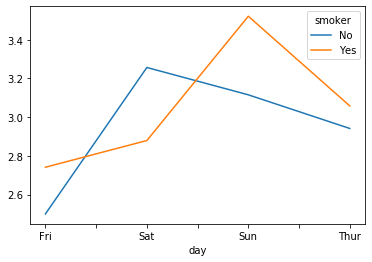

In [85]:
x.xs('Male',axis=1).plot()

In [87]:
x.columns

MultiIndex([('Female',  'No'),
            ('Female', 'Yes'),
            (  'Male',  'No'),
            (  'Male', 'Yes')],
           names=['sex', 'smoker'])

In [81]:
d = {'num_legs': [4, 4, 2, 2],

     'num_wings': [0, 0, 2, 2],

     'class': ['mammal', 'mammal', 'mammal', 'bird'],

     'animal': ['cat', 'dog', 'bat', 'penguin'],

     'locomotion': ['walks', 'walks', 'flies', 'walks']}

df = pd.DataFrame(data=d)

df = df.set_index(['class', 'animal', 'locomotion'])

df

num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2

In [82]:
df.xs('mammal')

,,num_legs,num_wings
animal,locomotion,,
cat,walks,4,0
dog,walks,4,0
bat,flies,2,2


In [83]:
df.xs('num_wings', axis=1)

class   animal   locomotion
mammal  cat      walks         0
        dog      walks         0
        bat      flies         2
bird    penguin  walks         2
Name: num_wings, dtype: int64